## SETUP

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
# from tensorflow.keras.applications import DenseNet121

## DATA INGESTION

In [41]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

## Retrieving the images and their labels

In [42]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path,a))
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


## Converting lists into numpy arrays

In [50]:
data = np.array(data)
labels = np.array(labels)

In [51]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Splitting training and testing dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Converting the labels into one hot encoding

In [46]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


## Building the model - custom CNN model 

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

### Compilation of the model

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 62s 62ms/step - loss: 1.6639 - accuracy: 0.5795 - val_loss: 0.2796 - val_accuracy: 0.9255
Epoch 2/15
981/981 [==============================] - 67s 68ms/step - loss: 0.4838 - accuracy: 0.8633 - val_loss: 0.1331 - val_accuracy: 0.9652
Epoch 3/15
981/981 [==============================] - 66s 67ms/step - loss: 0.3298 - accuracy: 0.9082 - val_loss: 0.0706 - val_accuracy: 0.9821
Epoch 4/15
981/981 [==============================] - 62s 63ms/step - loss: 0.2663 - accuracy: 0.9247 - val_loss: 0.0718 - val_accuracy: 0.9804
Epoch 5/15
981/981 [==============================] - 67s 68ms/step - loss: 0.2424 - accuracy: 0.9329 - val_loss: 0.0653 - val_accuracy: 0.9846
Epoch 6/15
981/981 [==============================] - 69s 70ms/step - loss: 0.2179 - accuracy: 0.9429 - val_loss: 0.0729 - val_accuracy: 0.9816
Epoch 7/15
981/981 [==============================] - 65s 66ms/step - loss: 0.2360 - accuracy: 0.9393 - val_loss: 0.0506 - val_accuracy:

d:\Capstone\capstone.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### plotting graphs for accuracy

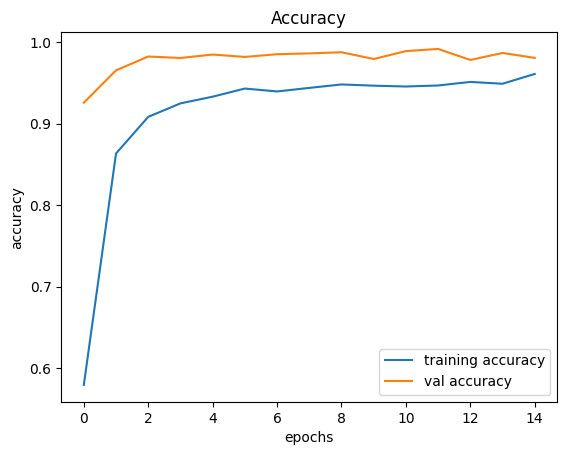

In [39]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

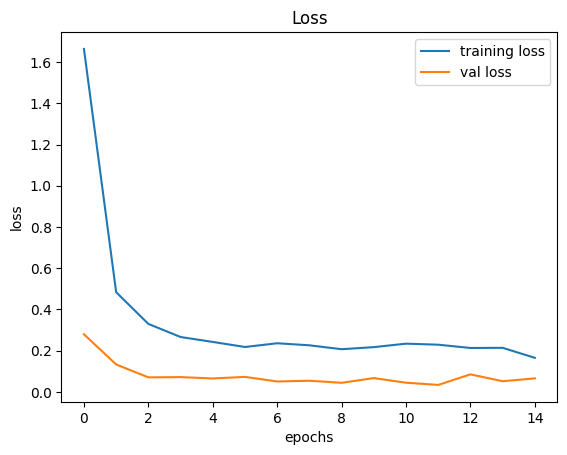

In [40]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### testing accuracy on test dataset

In [57]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
print(labels.shape)
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
print(pred.shape)

(12630,)
395/395 [==============================] - 3s 8ms/step
(12630, 43)


### Accuracy with the test data

In [62]:
true_labels =  labels 
predicted_labels =  pred 

predicted_classes = np.argmax(predicted_labels, axis=1)  

print("accuracy: ",accuracy_score(true_labels, predicted_classes))

model.save("traffic_classifier.h5")


accuracy:  0.9513855898653999


d:\Capstone\capstone.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Custom CNN Model - prediction

In [1]:
from keras.models import load_model
model = load_model(r"traffic_classifier.h5")

### classes

In [2]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### creating the function

In [7]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

### predicting 

1/1 [==============================] - 0s 49ms/step
Predicted traffic sign is:  Keep right


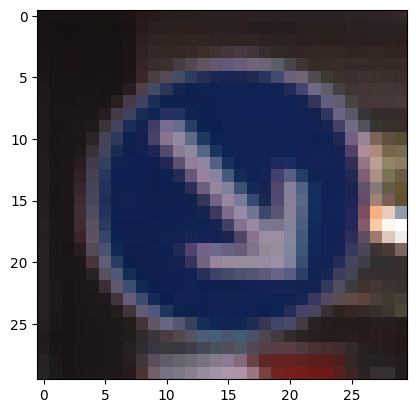

In [12]:
plot, prediction = test_on_img(r'Test\00005.png')
predicted_class_index = np.argmax(prediction)
predicted_class = classes[predicted_class_index]

print("Predicted traffic sign is: ", predicted_class)
plt.imshow(plot)
plt.show()


## Building VGGNet model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = X_train/255 
X_test = X_test/255

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [54]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [56]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))  

### Compilation of the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
981/981 [==============================] - 208s 208ms/step - loss: 1.3874 - accuracy: 0.5822 - val_loss: 0.1776 - val_accuracy: 0.9448
Epoch 2/5
981/981 [==============================] - 221s 225ms/step - loss: 0.1518 - accuracy: 0.9561 - val_loss: 0.0978 - val_accuracy: 0.9716
Epoch 3/5
981/981 [==============================] - 256s 262ms/step - loss: 0.0785 - accuracy: 0.9782 - val_loss: 0.0472 - val_accuracy: 0.9866
Epoch 4/5
981/981 [==============================] - 945s 964ms/step - loss: 0.0610 - accuracy: 0.9841 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 5/5
981/981 [==============================] - 257s 261ms/step - loss: 0.0516 - accuracy: 0.9866 - val_loss: 0.0433 - val_accuracy: 0.9878


### plotting graphs for accuracy

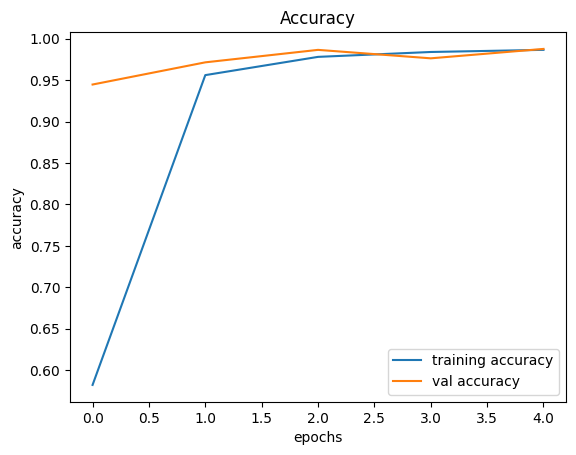

In [71]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

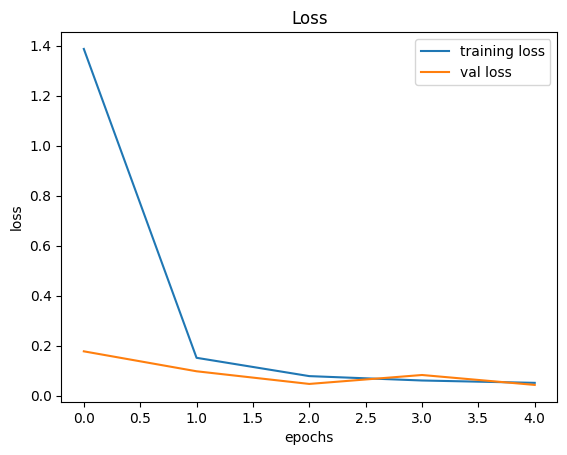

In [59]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### testing accuracy on test dataset

In [60]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
print(labels.shape)
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
print(pred.shape)

(12630,)
395/395 [==============================] - 18s 44ms/step
(12630, 43)


### Accuracy with the test data

In [78]:
true_labels =  labels 
predicted_labels =  pred 

predicted_classes = np.argmax(predicted_labels, axis=1)  

print("accuracy: ",accuracy_score(true_labels, predicted_classes))

model.save("traffic_classifier1.h5")

accuracy:  0.9216152019002375


d:\Capstone\capstone.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## VGGNet Model - Prediction

In [79]:
from keras.models import load_model
model1 = load_model(r"traffic_classifier1.h5")

### classes

In [81]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Creating the function

In [80]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model1.predict(X_test)
    return image,Y_pred

### Predicting

1/1 [==============================] - 0s 106ms/step
Predicted traffic sign is:  General caution


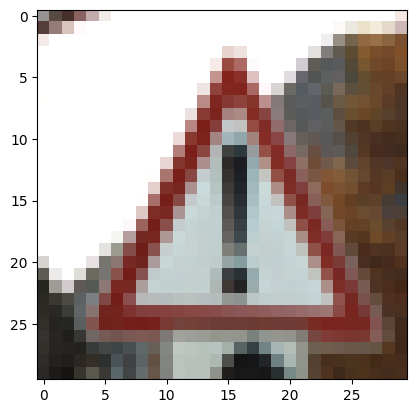

In [83]:
plot, prediction = test_on_img(r'Test\00006.png')
predicted_class_index = np.argmax(prediction)
predicted_class = classes[predicted_class_index]

print("Predicted traffic sign is: ", predicted_class)
plt.imshow(plot)
plt.show()